In [237]:
import numpy as np
import pandas as pd
import yfinance as yf
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from itertools import combinations
import json
import requests
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

In [238]:
da=pd.DataFrame()
data=pd.DataFrame()

coin=['BTC','UNI','SUSHI','CRV','SOL','MANA','COMP','DOGE','BAT','MATIC','ENJ','XMR','LINK','BCH','XLM','ADA','BNB','LTC','ETH']
#encoding= 'latin-1'

In [239]:
#sample test from years of data.
st = datetime.datetime(2022, 5, 15 , 0, 0)
en = datetime.datetime(2022, 5, 30, 0, 0)

j=1
for i in coin:
    da=pd.read_pickle(str(i)+'.pkl')
    da=da[st:en]
    data[i]=(da.groupby(pd.Grouper(freq='5Min')).agg({"open": "first","close": "last","low": "min","high": "max"})['close'])
    #data[i]=da['close']

In [240]:
data

,BTC,UNI,SUSHI,CRV,SOL,MANA,COMP,DOGE,BAT,MATIC,ENJ,XMR,LINK,BCH,XLM,ADA,BNB,LTC,ETH
ts,,,,,,,,,,,,,,,,,,,
2022-05-15 00:00:00,30008.04,5.16,1.305,1.414,51.96,1.3334,71.5,0.0894,0.4161,0.684,0.741,154.3,7.27,210.0,0.1379,0.5340,296.3,68.7,2050.04
2022-05-15 00:05:00,30015.12,5.15,1.309,1.413,51.87,1.2963,71.6,0.0892,0.4143,0.680,0.728,154.5,7.25,211.2,0.1377,0.5335,296.3,69.1,2050.69
2022-05-15 00:10:00,29996.55,5.15,1.302,1.413,51.53,1.2977,71.2,0.0890,0.4123,0.679,0.731,154.8,7.22,209.8,0.1374,0.5314,295.6,67.8,2050.01
2022-05-15 00:15:00,30171.17,5.21,1.333,1.448,52.18,1.3334,72.3,0.0902,0.4183,0.688,0.747,155.6,7.31,213.9,0.1387,0.5382,298.4,68.5,2069.00
2022-05-15 00:20:00,30173.46,5.23,1.336,1.437,52.48,1.3332,72.0,0.0902,0.4193,0.690,0.747,155.5,7.32,213.1,0.1386,0.5399,298.5,69.1,2073.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-29 23:40:00,29452.72,4.94,1.494,1.254,44.88,0.9738,57.3,0.0826,0.3716,0.598,0.613,186.9,6.71,185.4,0.1308,0.4813,305.9,63.9,1813.24
2022-05-29 23:45:00,29443.96,4.94,1.492,1.255,44.86,0.9714,57.2,0.0826,0.3713,0.597,0.612,185.9,6.72,185.1,0.1309,0.4803,305.8,63.8,1812.48
2022-05-29 23:50:00,29445.71,4.94,1.493,1.253,44.84,0.9724,57.0,0.0826,0.3719,0.597,0.613,186.1,6.71,185.0,0.1308,0.4806,305.6,63.8,1812.20


In [241]:
data.index

DatetimeIndex(['2022-05-15 00:00:00', '2022-05-15 00:05:00',
               '2022-05-15 00:10:00', '2022-05-15 00:15:00',
               '2022-05-15 00:20:00', '2022-05-15 00:25:00',
               '2022-05-15 00:30:00', '2022-05-15 00:35:00',
               '2022-05-15 00:40:00', '2022-05-15 00:45:00',
               ...
               '2022-05-29 23:15:00', '2022-05-29 23:20:00',
               '2022-05-29 23:25:00', '2022-05-29 23:30:00',
               '2022-05-29 23:35:00', '2022-05-29 23:40:00',
               '2022-05-29 23:45:00', '2022-05-29 23:50:00',
               '2022-05-29 23:55:00', '2022-05-30 00:00:00'],
              dtype='datetime64[ns]', name='ts', length=4321, freq='5T')

In [242]:
data.isnull().sum()

BTC      0
UNI      0
SUSHI    0
CRV      0
SOL      0
MANA     0
COMP     0
DOGE     0
BAT      0
MATIC    0
ENJ      0
XMR      0
LINK     0
BCH      0
XLM      0
ADA      0
BNB      0
LTC      0
ETH      0
dtype: int64

In [243]:
#Data is null only in beginning drop
from itertools import groupby

def contiguous(seq):
    return sum(1 for k,g in groupby(seq, lambda x: x is not None) if k) == 1

In [244]:
contiguous(data)

True

In [245]:
data.dropna(inplace=True)

In [246]:
data

,BTC,UNI,SUSHI,CRV,SOL,MANA,COMP,DOGE,BAT,MATIC,ENJ,XMR,LINK,BCH,XLM,ADA,BNB,LTC,ETH
ts,,,,,,,,,,,,,,,,,,,
2022-05-15 00:00:00,30008.04,5.16,1.305,1.414,51.96,1.3334,71.5,0.0894,0.4161,0.684,0.741,154.3,7.27,210.0,0.1379,0.5340,296.3,68.7,2050.04
2022-05-15 00:05:00,30015.12,5.15,1.309,1.413,51.87,1.2963,71.6,0.0892,0.4143,0.680,0.728,154.5,7.25,211.2,0.1377,0.5335,296.3,69.1,2050.69
2022-05-15 00:10:00,29996.55,5.15,1.302,1.413,51.53,1.2977,71.2,0.0890,0.4123,0.679,0.731,154.8,7.22,209.8,0.1374,0.5314,295.6,67.8,2050.01
2022-05-15 00:15:00,30171.17,5.21,1.333,1.448,52.18,1.3334,72.3,0.0902,0.4183,0.688,0.747,155.6,7.31,213.9,0.1387,0.5382,298.4,68.5,2069.00
2022-05-15 00:20:00,30173.46,5.23,1.336,1.437,52.48,1.3332,72.0,0.0902,0.4193,0.690,0.747,155.5,7.32,213.1,0.1386,0.5399,298.5,69.1,2073.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-29 23:40:00,29452.72,4.94,1.494,1.254,44.88,0.9738,57.3,0.0826,0.3716,0.598,0.613,186.9,6.71,185.4,0.1308,0.4813,305.9,63.9,1813.24
2022-05-29 23:45:00,29443.96,4.94,1.492,1.255,44.86,0.9714,57.2,0.0826,0.3713,0.597,0.612,185.9,6.72,185.1,0.1309,0.4803,305.8,63.8,1812.48
2022-05-29 23:50:00,29445.71,4.94,1.493,1.253,44.84,0.9724,57.0,0.0826,0.3719,0.597,0.613,186.1,6.71,185.0,0.1308,0.4806,305.6,63.8,1812.20


<AxesSubplot:xlabel='ts'>

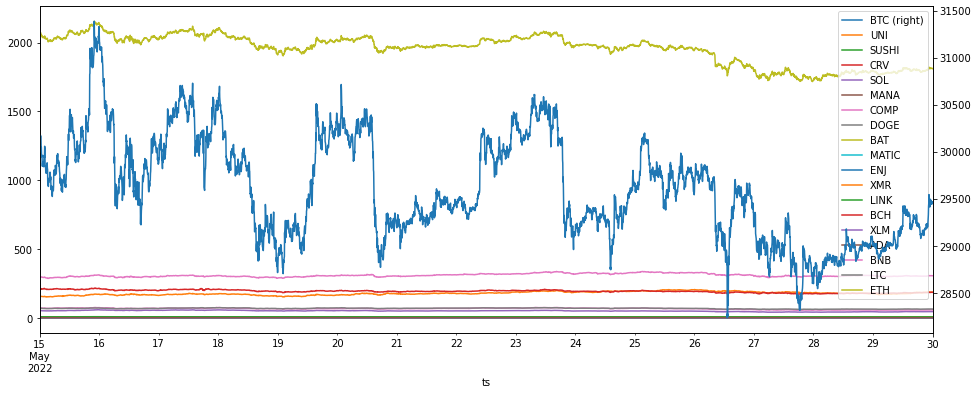

In [247]:
data.plot(secondary_y='BTC',figsize=(16,6))


## Engle Granger Approach

### Adf test for Stationary series.

In [248]:
from statsmodels.tsa.stattools import adfuller

In [249]:
#ADF test
def ADFtest(df):
    for stock in df.columns:
        result=adfuller(df[stock])
        print('p-value: {0} for {1}'.format(result[1],stock))
        if(result[1]<=0.05):
            print("Against Null hypo data is stationary")
        else:
            print("For Null hypo data is not stationary")

In [251]:
ADFtest(data)

p-value: 0.01088912861328024 for BTC
Against Null hypo data is stationary
p-value: 0.24625071514481628 for UNI
For Null hypo data is not stationary
p-value: 0.32727803145582857 for SUSHI
For Null hypo data is not stationary
p-value: 0.14228024350015517 for CRV
For Null hypo data is not stationary
p-value: 0.6283692989957181 for SOL
For Null hypo data is not stationary
p-value: 0.10990474195378191 for MANA
For Null hypo data is not stationary
p-value: 0.4768967532288611 for COMP
For Null hypo data is not stationary
p-value: 0.30610507904567297 for DOGE
For Null hypo data is not stationary
p-value: 0.020230666171440922 for BAT
Against Null hypo data is stationary
p-value: 0.3122069751775371 for MATIC
For Null hypo data is not stationary
p-value: 0.23776812543641251 for ENJ
For Null hypo data is not stationary
p-value: 0.21981289160146494 for XMR
For Null hypo data is not stationary
p-value: 0.26854759529815403 for LINK
For Null hypo data is not stationary
p-value: 0.24204111096021408 for

In [252]:
data_diff=pd.DataFrame()
for i in coin:
    data_diff[i]=data[i]-data[i].shift(1)

In [253]:
data_diff.dropna(inplace=True)
ADFtest(data_diff)

p-value: 0.0 for BTC
Against Null hypo data is stationary
p-value: 0.0 for UNI
Against Null hypo data is stationary
p-value: 0.0 for SUSHI
Against Null hypo data is stationary
p-value: 0.0 for CRV
Against Null hypo data is stationary
p-value: 0.0 for SOL
Against Null hypo data is stationary
p-value: 0.0 for MANA
Against Null hypo data is stationary
p-value: 0.0 for COMP
Against Null hypo data is stationary
p-value: 2.2303004713654043e-30 for DOGE
Against Null hypo data is stationary
p-value: 0.0 for BAT
Against Null hypo data is stationary
p-value: 0.0 for MATIC
Against Null hypo data is stationary
p-value: 0.0 for ENJ
Against Null hypo data is stationary
p-value: 0.0 for XMR
Against Null hypo data is stationary
p-value: 0.0 for LINK
Against Null hypo data is stationary
p-value: 0.0 for BCH
Against Null hypo data is stationary
p-value: 0.0 for XLM
Against Null hypo data is stationary
p-value: 0.0 for ADA
Against Null hypo data is stationary
p-value: 0.0 for BNB
Against Null hypo data i

### Testing for Cointegration

In [255]:
pair=pd.DataFrame()
for i in coin:
    for j in coin:
        if i!=j:
            Y = data[i]
            X = data[j]
            X= sm.add_constant(X)
            model = sm.OLS(Y,X)
            results = model.fit()
            resid_dumm= pd.DataFrame(results.resid)
            p_value=adfuller(resid_dumm)
            if p_value[1]<0.05:
                pair[(i,j)]= pd.DataFrame(results.resid)  


In [256]:
pair = pair.loc[:,~pair.columns.duplicated()]
pair.info()
#(Dependent,independent)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4321 entries, 2022-05-15 00:00:00 to 2022-05-30 00:00:00
Freq: 5T
Columns: 135 entries, ('BTC', 'UNI') to ('ETH', 'ADA')
dtypes: float64(135)
memory usage: 4.5 MB


### ECM 

In [257]:
pair.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4321 entries, 2022-05-15 00:00:00 to 2022-05-30 00:00:00
Freq: 5T
Columns: 135 entries, ('BTC', 'UNI') to ('ETH', 'ADA')
dtypes: float64(135)
memory usage: 4.5 MB


In [258]:
data_diff_1=data_diff.shift(1)
data_diff_1.fillna(method='bfill',inplace=True)


In [259]:
ecmodel=pd.DataFrame
sel_pair=[]
error_coeff=[]
for i in pair.columns:
    
    y=pd.DataFrame()
    y= pd.DataFrame(data_diff[i[0]]) ###(Dependent,independent)
    X=pd.DataFrame()
    X[str(i[0])+"1"]=data_diff_1[i[0]] #Extended eqn of Graner Approach.
    X[i[1]]=data_diff[i[1]]
    X[str(i[1])+"1"]=data_diff_1[i[1]]
         
    X['residual']= pair[i]
    X=sm.add_constant(X)
    
    store= data[i[1]].shift(1)
    store.fillna(method='bfill',inplace=True)
    X[str(i[1])+'res']=data[i[1]]-store
    
    
    model=sm.OLS(y,X)
    results=model.fit()
    print("Error COefficient of {0} pair is {1}".format(i,results.params.loc['residual']))
    print(results.summary())
    error_coeff.append(results.params.loc['residual'])
    sel_pair.append(i)
    
    
sel_pair1=pd.DataFrame()
sel_pair1['pairs']= sel_pair
sel_pair1['error_coeff']= error_coeff
#Also check Durbin-Watson statistic and R-squared value along with t-stats for spurious regression.

Error COefficient of ('BTC', 'UNI') pair is 0.003421468173689068
                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     1029.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:15   Log-Likelihood:                -22060.
No. Observations:                4320   AIC:                         4.413e+04
Df Residuals:                    4315   BIC:                         4.416e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Error COefficient of ('BTC', 'MANA') pair is 0.005450781857406445
                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     1535.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:15   Log-Likelihood:                -21595.
No. Observations:                4320   AIC:                         4.320e+04
Df Residuals:                    4315   BIC:                         4.323e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     2023.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:15   Log-Likelihood:                -21225.
No. Observations:                4320   AIC:                         4.246e+04
Df Residuals:                    4315   BIC:                         4.249e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1288      0.501      0.257      0.7

Error COefficient of ('BTC', 'BNB') pair is 0.0013497815015769915
                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     2327.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:15   Log-Likelihood:                -21023.
No. Observations:                4320   AIC:                         4.206e+04
Df Residuals:                    4315   BIC:                         4.209e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

Error COefficient of ('SOL', 'BTC') pair is 0.0013897897989198491
                            OLS Regression Results                            
Dep. Variable:                    SOL   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1800.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:15   Log-Likelihood:                 2717.2
No. Observations:                4320   AIC:                            -5424.
Df Residuals:                    4315   BIC:                            -5393.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

Error COefficient of ('SOL', 'ADA') pair is 0.01153823348908591
                            OLS Regression Results                            
Dep. Variable:                    SOL   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     2245.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:15   Log-Likelihood:                 3027.4
No. Observations:                4320   AIC:                            -6045.
Df Residuals:                    4315   BIC:                            -6013.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

Error COefficient of ('MANA', 'MATIC') pair is 0.001212626669868657
                            OLS Regression Results                            
Dep. Variable:                   MANA   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1881.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:16   Log-Likelihood:                 19039.
No. Observations:                4320   AIC:                        -3.807e+04
Df Residuals:                    4315   BIC:                        -3.804e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Error COefficient of ('COMP', 'ENJ') pair is 0.009385984250753134
                            OLS Regression Results                            
Dep. Variable:                   COMP   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     1521.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:16   Log-Likelihood:                 1006.7
No. Observations:                4320   AIC:                            -2003.
Df Residuals:                    4315   BIC:                            -1972.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

Error COefficient of ('DOGE', 'SOL') pair is 0.009301280042152141
                            OLS Regression Results                            
Dep. Variable:                   DOGE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1013.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:16   Log-Likelihood:                 31158.
No. Observations:                4320   AIC:                        -6.231e+04
Df Residuals:                    4315   BIC:                        -6.227e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

Error COefficient of ('DOGE', 'LINK') pair is 0.007841915855622895
                            OLS Regression Results                            
Dep. Variable:                   DOGE   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     1070.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:16   Log-Likelihood:                 31215.
No. Observations:                4320   AIC:                        -6.242e+04
Df Residuals:                    4315   BIC:                        -6.239e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

Error COefficient of ('BAT', 'SOL') pair is 0.007192830897188112
                            OLS Regression Results                            
Dep. Variable:                    BAT   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1616.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:16   Log-Likelihood:                 23792.
No. Observations:                4320   AIC:                        -4.757e+04
Df Residuals:                    4315   BIC:                        -4.754e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Error COefficient of ('BAT', 'MATIC') pair is 0.01334404710584653
                            OLS Regression Results                            
Dep. Variable:                    BAT   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2039.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:16   Log-Likelihood:                 24107.
No. Observations:                4320   AIC:                        -4.820e+04
Df Residuals:                    4315   BIC:                        -4.817e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    BAT   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1682.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:16   Log-Likelihood:                 23844.
No. Observations:                4320   AIC:                        -4.768e+04
Df Residuals:                    4315   BIC:                        -4.765e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.347e-06   1.48e-05     -0.362      0.7

Error COefficient of ('MATIC', 'MANA') pair is 0.0030608482992897203
                            OLS Regression Results                            
Dep. Variable:                  MATIC   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     1913.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:17   Log-Likelihood:                 21954.
No. Observations:                4320   AIC:                        -4.390e+04
Df Residuals:                    4315   BIC:                        -4.387e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Error COefficient of ('ENJ', 'SOL') pair is 0.006834701640904145
                            OLS Regression Results                            
Dep. Variable:                    ENJ   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1675.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:17   Log-Likelihood:                 21121.
No. Observations:                4320   AIC:                        -4.223e+04
Df Residuals:                    4315   BIC:                        -4.220e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Error COefficient of ('ENJ', 'ETH') pair is 0.012992909924372954
                            OLS Regression Results                            
Dep. Variable:                    ENJ   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1796.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:17   Log-Likelihood:                 21213.
No. Observations:                4320   AIC:                        -4.242e+04
Df Residuals:                    4315   BIC:                        -4.238e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Error COefficient of ('LINK', 'MATIC') pair is 0.024070450898956743
                            OLS Regression Results                            
Dep. Variable:                   LINK   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     2176.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:17   Log-Likelihood:                 12266.
No. Observations:                4320   AIC:                        -2.452e+04
Df Residuals:                    4315   BIC:                        -2.449e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    BCH   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1196.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:17   Log-Likelihood:                -2631.0
No. Observations:                4320   AIC:                             5272.
Df Residuals:                    4315   BIC:                             5304.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0049      0.007     -0.719      0.4

Error COefficient of ('BCH', 'ENJ') pair is 0.014262096066705523
                            OLS Regression Results                            
Dep. Variable:                    BCH   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1074.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:18   Log-Likelihood:                -2750.8
No. Observations:                4320   AIC:                             5512.
Df Residuals:                    4315   BIC:                             5543.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    XLM   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1383.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:18   Log-Likelihood:                 29767.
No. Observations:                4320   AIC:                        -5.952e+04
Df Residuals:                    4315   BIC:                        -5.949e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.661e-07   3.75e-06     -0.258      0.7

Error COefficient of ('XLM', 'ADA') pair is 0.007899940677616393
                            OLS Regression Results                            
Dep. Variable:                    XLM   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1599.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:18   Log-Likelihood:                 29950.
No. Observations:                4320   AIC:                        -5.989e+04
Df Residuals:                    4315   BIC:                        -5.986e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Error COefficient of ('ADA', 'BAT') pair is 0.002273835875119376
                            OLS Regression Results                            
Dep. Variable:                    ADA   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     1864.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:18   Log-Likelihood:                 23232.
No. Observations:                4320   AIC:                        -4.645e+04
Df Residuals:                    4315   BIC:                        -4.642e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Error COefficient of ('ETH', 'COMP') pair is 0.006176767138294816
                            OLS Regression Results                            
Dep. Variable:                    ETH   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     1366.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:30:18   Log-Likelihood:                -11028.
No. Observations:                4320   AIC:                         2.207e+04
Df Residuals:                    4315   BIC:                         2.210e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [260]:
sel_pair1.sort_values(by='error_coeff',inplace=True)
sel_pair1

,pairs,error_coeff
37,"(MANA, ADA)",-0.000494
29,"(MANA, SUSHI)",-0.000321
30,"(MANA, SOL)",-0.000158
38,"(MANA, LTC)",-0.000094
118,"(ADA, MANA)",0.000276
...,...,...
76,"(MATIC, ADA)",0.017490
61,"(BAT, ENJ)",0.017689
64,"(BAT, BCH)",0.018846
74,"(MATIC, LINK)",0.021451


In [261]:
#Non rolling hedge ratio calculation.
r=sm.OLS(data['MANA'],data['ADA']).fit()
hedge= r.params
hedge[0]

pair = data[['MANA', 'ADA' ]]
pair['series'] = (data['MANA']-data['ADA']*hedge[0])
pair['norm_series'] = zscore(pair['series'])

In [262]:
def zscore(series):
    return (series - series.mean()) / np.std(series)
ratio= data['MANA']-data['ADA']*hedge[0]

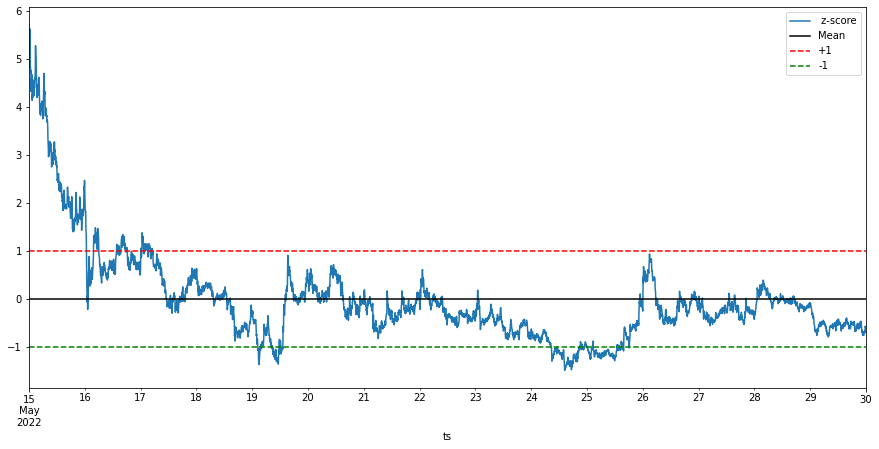

In [263]:
zscore(ratio).plot(figsize=(15,7))
plt.axhline(zscore(ratio).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend([' z-score', 'Mean', '+1', '-1'])
plt.show()

In [264]:
pair

,MANA,ADA,series,norm_series
ts,,,,
2022-05-15 00:00:00,1.3334,0.5340,0.227030,5.727656
2022-05-15 00:05:00,1.2963,0.5335,0.190966,4.821457
2022-05-15 00:10:00,1.2977,0.5314,0.196717,4.965963
2022-05-15 00:15:00,1.3334,0.5382,0.218328,5.509002
2022-05-15 00:20:00,1.3332,0.5399,0.214606,5.415474
...,...,...,...,...
2022-05-29 23:40:00,0.9738,0.4813,-0.023383,-0.564595
2022-05-29 23:45:00,0.9714,0.4803,-0.023711,-0.572841
2022-05-29 23:50:00,0.9724,0.4806,-0.023333,-0.563331


In [265]:
def _level_crosses(series, level):
    change = []
    for i,el in enumerate(series):
        if (i!=0) and series[i]>level and series[i-1]<level:
            change.append(1)
        elif (i!=0) and series[i]<level and series[i-1]>level:
            change.append(-1)
        else:
            change.append(0)
    return change    

In [267]:
stop_losses = []
open_positions= []
closed_positions = []
profits = []

def trading_signals_1(spread, n_series):
   # print(open_pos)
    upper_trading = _level_crosses(n_series, level = 1)
    #print(upper_trading)
    lower_trading = _level_crosses(n_series, level = -1)
    #print(lower_trading)
    upper_stop = _level_crosses(n_series, level = 3)
    #upper_stop[0] = 
    lower_stop = _level_crosses(n_series, level = -3)
    #lower_stop[0] = l
    mean = _level_crosses(n_series, level = 0)
    open_pos=False
    for i in range(1, len(n_series)):
        if open_pos:
            #print('open')
            if (upper_stop[i] == 1 and f==1) or (lower_stop[i] == -1 and f==0):
                open_pos = False
                profits.append(-abs(spread[i] - entry_level))
                stop_losses.append((i,f))
            elif mean[i]!=0:
                open_pos = False
                profits.append(abs(spread[i] - entry_level))
                closed_positions.append((i,f))
            else:
                profits.append(0)
        
        else:
            #print('else')
            if upper_trading[i] == -1 or lower_trading[i] == 1:
                #print('yes')
                open_pos = True
                entry_level = spread[i]
                
                if upper_trading[i] == -1:
                    f=1
                    open_positions.append((i,f))
                    upper_stop = _level_crosses(n_series, level = 1.5+n_series[i])
                    
                else:
                    f=0
                    open_positions.append((i,f))
                    lower_stop = _level_crosses(n_series, level = n_series[i]-1.5)
            profits.append(0)
   
    return stop_losses, open_positions,closed_positions,profits,open_pos, upper_stop[i], lower_stop[i], entry_level,f


In [268]:
trading_signals_1(pair['series'], pair['norm_series'])

([],
 [(297, 1), (361, 1), (1193, 0), (2727, 0)],
 [(301, 1), (710, 1), (1323, 0), (3152, 0)],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [269]:
np.sum(profits)

0.1568658101779099

In [270]:
tot_profits=pd.DataFrame(profits)

In [271]:
tot_profits= tot_profits[tot_profits!=0]

In [272]:
print("Total Profit is {0}".format(np.sum(profits)))
tot_profits.describe()

Total Profit is 0.1568658101779099


,0
count,4.000000
mean,0.039216
std,0.001399
min,0.037730
25%,0.038235
50%,0.039173
75%,0.040155
max,0.040789


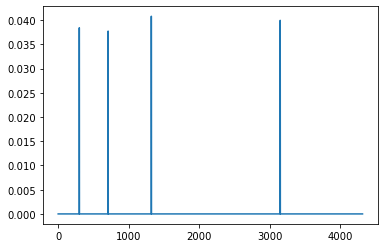

In [273]:
plt.plot(profits)

In [274]:
open_positions

[(297, 1), (361, 1), (1193, 0), (2727, 0)]

In [275]:
closed_positions

[(301, 1), (710, 1), (1323, 0), (3152, 0)]

In [276]:
stop_losses

[]

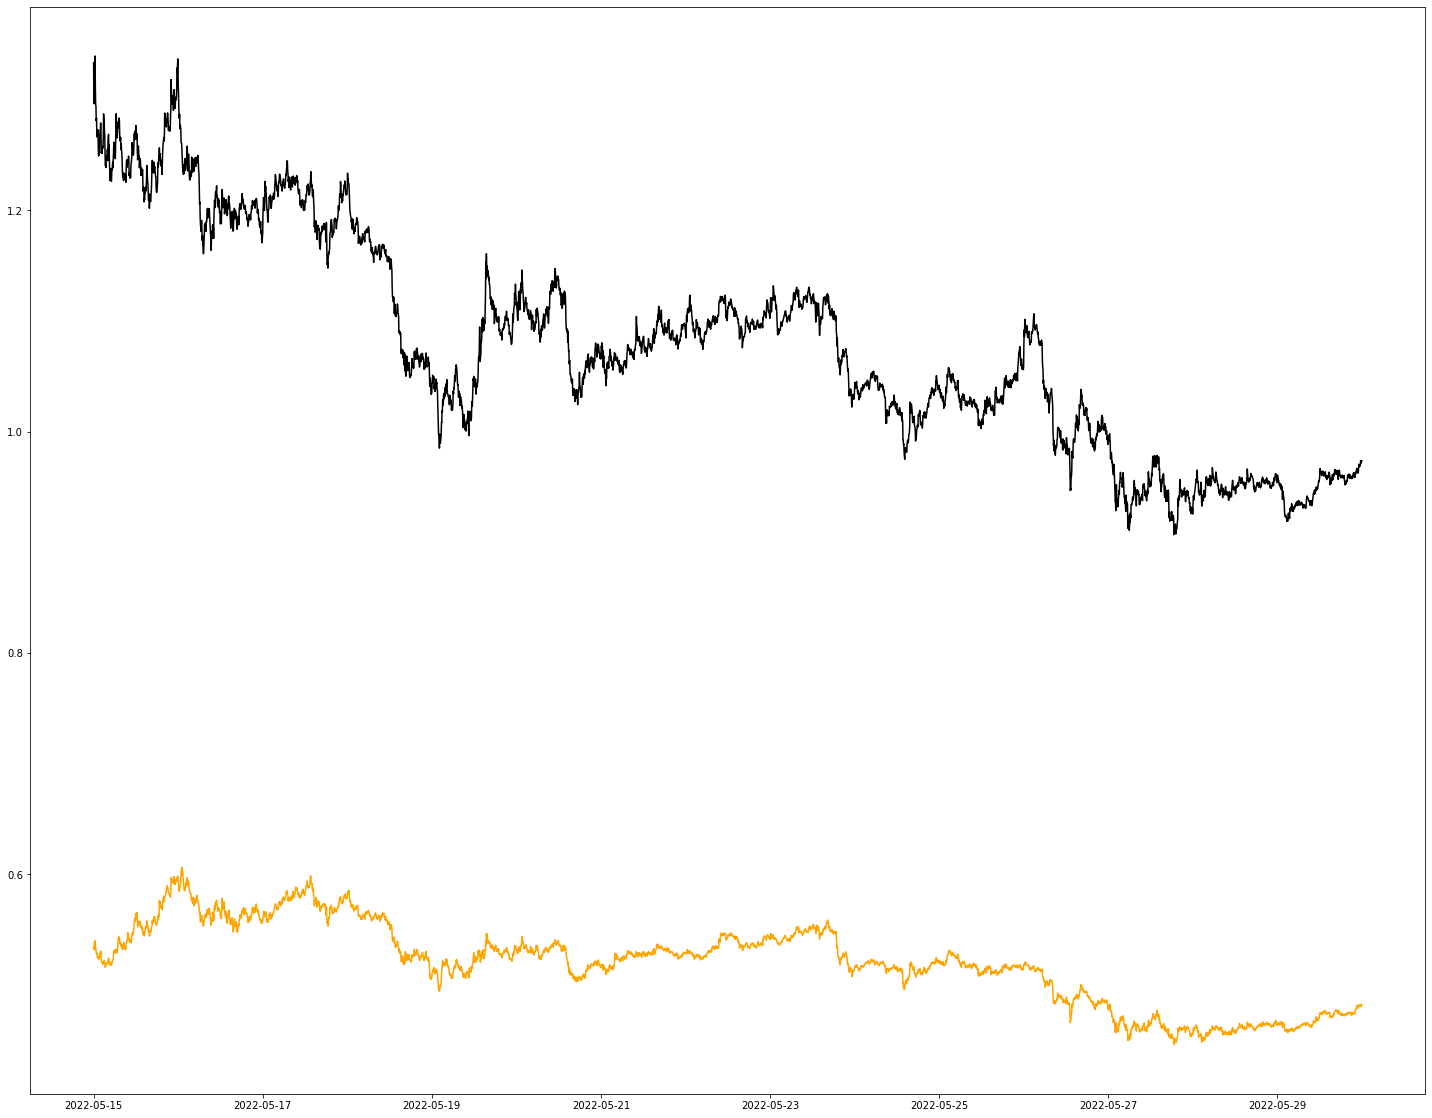

In [279]:
plt.figure(figsize=(25, 20))
plt.plot(pair['MANA'], color= 'black')
ax=plt.plot(pair['ADA'], color= 'orange')

In [280]:
op = []
for i in open_positions:
    op.append(i[0])
cl = []
for i in closed_positions:
    cl.append(i[0])
sl = []
for i in stop_losses:
    sl.append(i[0])


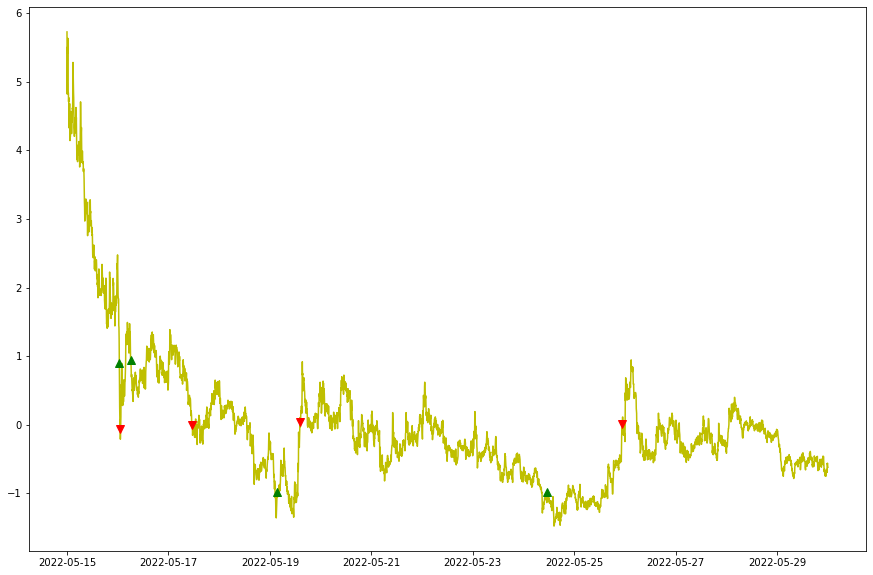

In [281]:
plt.figure(figsize=(15, 10))
plt.plot(pair.iloc[:,[3]], color= 'y')
plt.plot(pair['norm_series'][op], '^', markersize=8, color='g')
plt.plot(pair['norm_series'][cl], 'v', markersize=8, color='r')
plt.plot(pair['norm_series'][sl], 'v', markersize=8, color='b')